In [ ]:
#What is the problem??
#It dramatically depends on the kind of fantasy league you are playing
#(1)Trying to predict which player combinations will win you the most number of points in any given week?
#(2)Which players are going to be the best players next week/year/month?
#One thing that is interesting is that best players probably, but might not, add up to the best teams



In [281]:
import numpy as np
import pandas as pd
import requests
import keras
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline  


In [ ]:
#http://danielfrg.com/blog/2013/04/01/nba-scraping-data/
url = 'http://espn.go.com/nba/teams'
r = requests.get(url)

soup = BeautifulSoup(r.text)
tables = soup.find_all('ul', class_='medium-logos')

teams = []
prefix_1 = []
prefix_2 = []
teams_urls = []
for table in tables:
    lis = table.find_all('li')
    for li in lis:
        info = li.h5.a
        teams.append(info.text)
        url = info['href']
        teams_urls.append(url)
        prefix_1.append(url.split('/')[-2])
        prefix_2.append(url.split('/')[-1])


dic = {'url': teams_urls, 'prefix_2': prefix_2, 'prefix_1': prefix_1}
teams = pd.DataFrame(dic, index=teams)

In [ ]:
team_prefixes_bbal_ref = ['BOS', 'BRK', 'NYK', 'PHI', 'TOR', 'GSW', 'LAC', 'LAL', 'PHO', 'SAC', 
                          'CHI', 'CLE', 'DET', 'IND', 'MIL', 'DAL', 'HOU', 'MEM','SAS', 'ATL','CHO', 'MIA',
                         ]

In [ ]:
BASE_URL_BBALL_REF = 'http://www.basketball-reference.com/teams/CLE/2017.html'
r = requests.get(BASE_URL_BBALL_REF)
table = BeautifulSoup(r.text)

In [ ]:
BASE_URL_BBALL_REF = 'http://www.basketball-reference.com/teams/{0}/{1}.html'
r = requests.get(BASE_URL_BBALL_REF)
column_headers = [u'Name', u'Age', u'G', u'GS', u'MP', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS']

for year in range(1995, 2018):
    player_data = []
    for index, row in teams.iterrows():
        r = requests.get(BASE_URL_BBALL_REF.format(row['prefix_1'].upper(), year))
        html = str(BeautifulSoup(r.text).find(id="all_totals"))
        formatted_html = html.replace("<!--", "")
        table = BeautifulSoup(formatted_html).find(id="totals").find_all('tr')
        player_data_per_team = []
        for row in table[1:]:
            data = [td.getText() for td in row.findAll('td')]
            player_data_per_team.append(data)
        without_totals = player_data_per_team[:-1]
        print(without_totals)
        #formatted_data = [[data[0].encode('utf-8')] + [float(x) for x in data[1:]] for data in without_totals]
        player_data.append(without_totals)
    df = pd.DataFrame(player_data, columns=column_headers)
    df.to_csv("player_stats_bball_ref" + str(year) + ".csv")

In [ ]:
html = str(BeautifulSoup(r.text).find(id="all_totals"))
formatted = html.replace("<!--", "")
table = BeautifulSoup(formatted).find(id="totals").find_all('tr')

headers = [u'Name', u'Age', u'G', u'GS', u'MP', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS']

player_data = []
for row in table[1:]: # Remove header
    data = [td.getText() for td in row.findAll('td')]
    player_data.append(data)
data_without_totals = player_data[:-1]
formatted_data = [[data[0].encode('utf-8')] + [float(x) for x in data[1:]] for data in data_without_totals]
pd.DataFrame(formatted_data, columns = headers)
        #player_data = []
#for row in table: # Remove header
 #   print(row.findAll('td').length)
  #  data = [x.getText() for x in row.findAll('td')]
   # formatted_data = [data[0].encode('utf-8')] + [float(x) for x in data[1:]]
    #player_data.append(formattedData)

# Collect data from espn from 2003 to 2017

In [ ]:
BASE_URL = 'http://www.espn.com/nba/team/stats/_/name/{0}/year/{1}'

column_headers = [u'PLAYER', u'GP', u'GS', u'MIN', u'PPG', u'OFFR', u'DEFR', u'RPG', u'APG', u'SPG', u'BPG', u'TPG', u'FPG', u'A/TO', u'PER']

def normalizeColumn(column):
    theMax = column.max()
    theMin = column.min()
    normalizedColumn = [ (record - theMin) / (theMax - theMin) for record in column]
    return normalizedColumn

for year in range(2003, 2018):
    player_data = []
    for index, row in teams.iterrows():
        r = requests.get(BASE_URL.format(row['prefix_1'], year))
        table = BeautifulSoup(r.text).table
        for row in table.find_all('tr')[2:][:-1]: # Remove header
            data = [td.getText() for td in row.findAll('td')]
            formattedData = [data[0].encode('utf-8')] + [float(x) for x in data[1:]] #formats the none-name fields to floats so we can do math
            player_data.append(formattedData)
    df = pd.DataFrame(player_data, columns=column_headers)
    for column in df.iloc[:,1:]:
        data = normalizeColumn(df[column])
        df[column + "_Normalized"] = data
    df['scores_Normalized'] = df.iloc[:,15:].apply(sum, axis = 1)
    df.to_csv("player_stats_" + str(year) + ".csv")

# Normalize monster basketball data

In [ ]:
def normalizeColumn(column):
    theMax = column.max()
    theMin = column.min()
    normalizedColumn = [ (record - theMin) / float((theMax - theMin)) for record in column]
    return normalizedColumn

categories = ['p','a','3','r','s','b','to', 'fg%','ft%','fta']
normed_categores = [cat + "_Normalized" for cat in categories]
dates = range(2004, 2018)
test = None
for date in dates:
    _file = 'monster_players_with_ranks_{0}.xls'.format(date)
    df = pd.read_excel(_file)
    for x in categories:
        cat = df[x]
        normed = normalizeColumn(cat)
        df[x + "_Normalized"] = normed
    scores = [sum([row[cat] for cat in normed_categores]) for label,row in df.iterrows()]
    df['normalized_score'] = scores
    df.to_csv("normalized_" + _file)

In [ ]:
pd.read_csv('normalized_monster_players_with_ranks_2013.xls')

# Train LR Model Using monster data and features to predict my normalized scores

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


features = ['Age', 'g', 'S%',
       'm', 'p', '3', 'r', 'a', 's', 'b', 'fg%', 'fga', 'ft%', 'fta', 'to',
       '3%', '3a', '2%', '2a', 'adjfg%', 'dr', 'or', '2d', '3d', 'fg',
       'fgm', 'pf', 'ft', 'ftm', '3m', '2', 'ato', 'a+to', 'netft', 'to48',
       '3s48', 'dpg', 'ppg', 'g.1', 's+b', 'p48', 'str', 'a-to', 'tech',
       '3a/fga', 'ts%', 'USG', 'pV', '3V', 'rV', 'aV', 'sV', 'bV', 'fg%V',
       'ft%V', 'toV', '3%V', '2%V', 'adjfg%V', 'drV', 'orV', '2dV', '3dV',
       'fgV', 'fgaV', 'fgmV', 'pfV', 'ftV', 'ftaV', 'ftmV', 'mV', '3aV',
       '3mV', '2V', '2aV', 'atoV', 'netftV', 'to48V', '3s48V', 'dpgV',
       'ppgV', 's+bV', 'p48V', 'strV', 'a-toV', 'techV', '3a/fgaV', 'ts%V',
       'p_Normalized', 'a_Normalized', '3_Normalized', 'r_Normalized',
       's_Normalized', 'b_Normalized', 'to_Normalized', 'fg%_Normalized',
       'ft%_Normalized', 'fta_Normalized', 'normalized_score']


rankings = ['Y!Adp9', 'CBSAdp', 'CBSRank',
       'FanTraxADP', 'Y!ORank', 'Y!Avg$', 'Y!Proj$', 'NBA Salary',
       'ESPNAdp8', 'ESPNRank', 'ESPN$', 'ESPNProj$', 'Y!%', 'Value', 'Name', 'normalized_score']

y = 'Y!ORank'

player_stats_by_year = []
for year in range(2013, 2015):
    if(year != 2017):
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y]]
        renamed_scores = scores_next_year.rename(index=str, columns={y: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)

all_player_data = pd.concat(player_stats_by_year)
lr = LinearRegression(n_jobs=-1)
X = all_player_data
y = all_player_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_features = X_train[features]
X_test_features = X_test[features]
lr.fit(X_train_features,y_train)
y_pred = [lr.predict([row]) for label,row in X_test_features.iterrows()]
print(mean_absolute_error(y_test, X_test['Y!ORank']))
print(mean_absolute_error(y_test, y_pred))
zip(y_test, y_pred, X_test['Name'], X_test['year'])

players_2016 = pd.read_csv('normalized_monster_players_with_ranks_2016.xls')
players = players_2016.Name
X_2016 = players_2016[features]
y_pred = [lr.predict([row])[0] for label,row in X_2016.iterrows()]
pred_2016 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2016.sort_values(by=['score'], ascending=False)


In [297]:
data_2016 = pd.read_csv('normalized_monster_players_with_ranks_2013.xls')
data_2016.Name

0             LeBron James
1             Kevin Durant
2             James Harden
3            Stephen Curry
4              Kobe Bryant
5               Chris Paul
6               Al Horford
7        Russell Westbrook
8                David Lee
9             Al Jefferson
10       LaMarcus Aldridge
11              Tim Duncan
12          Deron Williams
13         Carmelo Anthony
14           Blake Griffin
15             Dwyane Wade
16             Paul Pierce
17             Tony Parker
18             Brook Lopez
19          Thaddeus Young
20              Marc Gasol
21              Chris Bosh
22             Paul George
23             Serge Ibaka
24             Mike Conley
25        Chandler Parsons
26           Nicolas Batum
27            Kemba Walker
28          Damian Lillard
29           Jose Calderon
              ...         
418           Devin Ebanks
419         Diante Garrett
420          Danny Granger
421         Ben Hansbrough
422      Tornike Shengelia
423            Chris Quinn
4

# Plot mse as a function of the increasing that data for LR

[(12, 0.62003982614471242), (11, 0.53993788115981989), (10, 0.62794609699650494), (9, 0.6047477203659184), (8, 0.61302122720962071), (7, 0.57840916927821695), (6, 0.62793527741268373), (5, 0.60388263037706569), (4, 0.63234942090273671), (3, 0.74442761574940197), (2, 0.6111641597622619), (1, 0.96192539695286805)]


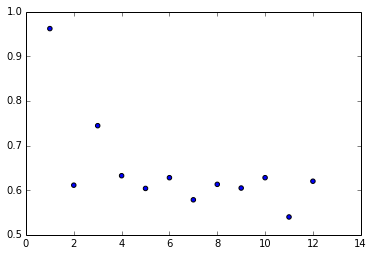

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


features = ['Age', 'g', 'S%',
       'm', 'p', '3', 'r', 'a', 's', 'b', 'fg%', 'fga', 'ft%', 'fta', 'to',
       '3%', '3a', '2%', '2a', 'adjfg%', 'dr', 'or', '2d', '3d', 'fg',
       'fgm', 'pf', 'ft', 'ftm', '3m', '2', 'ato', 'a+to', 'netft', 'to48',
       '3s48', 'dpg', 'ppg', 'g.1', 's+b', 'p48', 'str', 'a-to', 'tech',
       '3a/fga', 'ts%', 'USG', 'pV', '3V', 'rV', 'aV', 'sV', 'bV', 'fg%V',
       'ft%V', 'toV', '3%V', '2%V', 'adjfg%V', 'drV', 'orV', '2dV', '3dV',
       'fgV', 'fgaV', 'fgmV', 'pfV', 'ftV', 'ftaV', 'ftmV', 'mV', '3aV',
       '3mV', '2V', '2aV', 'atoV', 'netftV', 'to48V', '3s48V', 'dpgV',
       'ppgV', 's+bV', 'p48V', 'strV', 'a-toV', 'techV', '3a/fgaV', 'ts%V',
       'p_Normalized', 'a_Normalized', '3_Normalized', 'r_Normalized',
       's_Normalized', 'b_Normalized', 'to_Normalized', 'fg%_Normalized',
       'ft%_Normalized', 'fta_Normalized', 'normalized_score']


rankings = ['Y!Adp9', 'CBSAdp', 'CBSRank',
       'FanTraxADP', 'Y!ORank', 'Y!Avg$', 'Y!Proj$', 'NBA Salary',
       'ESPNAdp8', 'ESPNRank', 'ESPN$', 'ESPNProj$', 'Y!%', 'Value', 'Name', 'normalized_score']

y_target = 'normalized_score'

ranges = [range(x, 2016) for x in range(2004, 2016)]
error = []
for aRange in ranges:
    player_stats_by_year = []
    for year in aRange:
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y_target]]
        renamed_scores = scores_next_year.rename(index=str, columns={y_target: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)
    all_player_data = pd.concat(player_stats_by_year)
    lr = LinearRegression(n_jobs=-1)
    X = all_player_data
    y = all_player_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train_features = X_train[features]
    X_test_features = X_test[features]
    lr.fit(X_train_features,y_train)
    y_pred = [lr.predict([row]) for label,row in X_test_features.iterrows()]
    mse = mean_squared_error(y_test, y_pred)
    error.append((len(aRange), mse))
iters = zip(*error)[0]
mse = zip(*error)[1]
print(error)
plt.scatter(x=iters, y=mse)

In [ ]:
from sklearn.feature_selection import SelectKBest

# Feature selection - show features with lowest p values

In [ ]:
sb = SelectKBest()
sb.fit(X[features].as_matrix(), np.array(y))
scores = zip(sb.pvalues_, features)
scores.sort(key=lambda tup: tup[0])
scores

# Train using Keras Neural Net and Plot mse on Increasing Data

In [283]:
len(features)

99

In [301]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model


ranges = [range(x, 2016) for x in range(2004, 2016)]
error = []
for aRange in ranges:
    player_stats_by_year = []
    for year in aRange:
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y_target]]
        renamed_scores = scores_next_year.rename(index=str, columns={y_target: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)
    all_player_data = pd.concat(player_stats_by_year)
    X = all_player_data
    y = all_player_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train_features = X_train[features]
    X_test_features = X_test[features]
    inputs = Input(shape=(shape,))
    hidden1 = Dense(10,init='normal', activation='relu')(inputs)
    predictions = Dense(1, init='normal')(hidden1)
    model = Model(input=inputs, output=predictions)
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X[features].as_matrix(), y,
              nb_epoch=10,
              validation_split=.15)
    y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
    mse = mean_squared_error(y_test, y_pred)
    error.append((len(aRange), mse))
iters = zip(*error)[0]
mse_2 = zip(*error)[1]
plt.scatter(x=iters, y=mse2)

Train on 3788 samples, validate on 669 samples
Epoch 1/10
3788/3788 [==============================] - 1s - loss: 7.9296 - val_loss: 1.4033
Epoch 2/10
3788/3788 [==============================] - 0s - loss: 1.3200 - val_loss: 0.7613
Epoch 3/10
3788/3788 [==============================] - 0s - loss: 0.9690 - val_loss: 0.6617
Epoch 4/10
3788/3788 [==============================] - 0s - loss: 0.8853 - val_loss: 0.6293
Epoch 5/10
3788/3788 [==============================] - 0s - loss: 0.8134 - val_loss: 0.7718
Epoch 6/10
3788/3788 [==============================] - 0s - loss: 0.7801 - val_loss: 0.5923
Epoch 7/10
3788/3788 [==============================] - 0s - loss: 0.7695 - val_loss: 0.5840
Epoch 8/10
3788/3788 [==============================] - 0s - loss: 0.7790 - val_loss: 0.5910
Epoch 9/10
3788/3788 [==============================] - 0s - loss: 0.7558 - val_loss: 0.5364
Epoch 10/10
3788/3788 [==============================] - 0s - loss: 0.7413 - val_loss: 0.5950
Train on 3465 samples,

NameError: name 'mse2' is not defined

In [300]:
plt.scatter(x=iters, y=mse2)

NameError: name 'mse2' is not defined

# Train using Keras Neural Net

In [292]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

inputs = Input(shape=(shape,))
hidden1 = Dense(10,init='normal', activation='relu')(inputs)
predictions = Dense(1, init='normal')(hidden1)
model = Model(input=inputs, output=predictions)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X[features].as_matrix(), y,
          nb_epoch=20,
          validation_split=.15)

y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
mean_squared_error(y_test, y_pred)

Train on 328 samples, validate on 59 samples
Epoch 1/20
328/328 [==============================] - 0s - loss: 16.0116 - val_loss: 3.2850
Epoch 2/20
328/328 [==============================] - 0s - loss: 5.7599 - val_loss: 2.6884
Epoch 3/20
328/328 [==============================] - 0s - loss: 3.8305 - val_loss: 3.0989
Epoch 4/20
328/328 [==============================] - 0s - loss: 2.6999 - val_loss: 2.6891
Epoch 5/20
328/328 [==============================] - 0s - loss: 2.0491 - val_loss: 2.4471
Epoch 6/20
328/328 [==============================] - 0s - loss: 1.6813 - val_loss: 2.4685
Epoch 7/20
328/328 [==============================] - 0s - loss: 1.5134 - val_loss: 2.1679
Epoch 8/20
328/328 [==============================] - 0s - loss: 1.2259 - val_loss: 2.0337
Epoch 9/20
328/328 [==============================] - 0s - loss: 1.1309 - val_loss: 1.8151
Epoch 10/20
328/328 [==============================] - 0s - loss: 1.0577 - val_loss: 1.6751
Epoch 11/20
328/328 [======================

1.0130812835237648

In [289]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

inputs = Input(shape=(shape,))
hidden1 = Dense(10,init='normal', activation='relu')(inputs)
hidden2 = Dense(10,init='normal', activation='relu')(hidden1)
hidden3 = Dense(10,init='normal', activation='linear')(hidden2)
predictions = Dense(1, init='normal')(hidden3)
model = Model(input=inputs, output=predictions)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_features.as_matrix(), y_train,
          nb_epoch=10,
          validation_split=.15)

y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
mean_squared_error(y_test, y_pred)

Train on 246 samples, validate on 44 samples
Epoch 1/10
246/246 [==============================] - 0s - loss: 9.5660 - val_loss: 7.7939
Epoch 2/10
246/246 [==============================] - 0s - loss: 5.7946 - val_loss: 4.3094
Epoch 3/10
246/246 [==============================] - 0s - loss: 2.1638 - val_loss: 1.4631
Epoch 4/10
246/246 [==============================] - 0s - loss: 1.1741 - val_loss: 1.4859
Epoch 5/10
246/246 [==============================] - 0s - loss: 1.1688 - val_loss: 1.4373
Epoch 6/10
246/246 [==============================] - 0s - loss: 1.0137 - val_loss: 1.5927
Epoch 7/10
246/246 [==============================] - 0s - loss: 0.9529 - val_loss: 1.3501
Epoch 8/10
246/246 [==============================] - 0s - loss: 0.9106 - val_loss: 1.3130
Epoch 9/10
246/246 [==============================] - 0s - loss: 0.9073 - val_loss: 1.3187
Epoch 10/10
246/246 [==============================] - 0s - loss: 0.8776 - val_loss: 1.3203


1.4222896865394137

In [ ]:
all_data = pd.read_csv('normalized_monster_players_with_ranks_2017.xls')
players = all_data.Name
X = all_data[features]
y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)

In [ ]:
stats_2015 = pd.read_csv('normalized_monster_players_with_ranks_2016.xls')
stats_2015.loc[stats_2015['Name'] == 'James Harden'].normalized_score

In [ ]:
all_data = pd.read_csv('normalized_monster_players_with_ranks_2017.xls')
players = all_data.Name
X = all_data[features]
y_pred = [lr.predict([row])[0] for label,row in X.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)

In [ ]:
t = pd.read_csv('normalized_monster_players_with_ranks_2016.xls')
t.shape[0]

# Train model and calculate mean absolute error on data from 2005 to 2016

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

player_stats_by_year = []
for year in range(2005, 2017):
    if(year != 2016):
        thisYear = pd.read_csv('player_stats_'+str(year)+".csv")
        nextYear = pd.read_csv('player_stats_'+str(year+1)+".csv")
        scores_next_year = nextYear[['PLAYER', 'scores_Normalized']]
        renamed_scores = scores_next_year.rename(index=str, columns={"scores_Normalized": "y"})
        merged = pd.merge(thisYear, renamed_scores, on='PLAYER')
        player_stats_by_year.append(merged)

all_player_data = pd.concat(player_stats_by_year)
lr = LinearRegression(n_jobs=-1)
X = all_player_data.iloc[:,2:16]
y = all_player_data.iloc[:,31]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr.fit(X_train,y_train)
y_pred = [lr.predict([row]) for label,row in X_test.iterrows()]
mean_absolute_error(y_test, y_pred)

# Test model on 2017 to predict for 2018

In [ ]:
all_data = pd.read_csv('player_stats_2017')
X = pd.read_csv('player_stats_2017').iloc[:,2:16]
players = all_data.PLAYER
y_pred = [lr.predict([row])[0] for label,row in X.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)

# Get all the games for all years between 2005 and 2017

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date

teams = pd.read_csv('teams.csv')
BASE_URL = 'http://espn.go.com/nba/team/schedule/_/name/{0}/year/{1}/{2}'

for year in range(2005, 2018):
    match_id = []
    dates = []
    home_team = []
    home_team_score = []
    visit_team = []
    visit_team_score = []
    for index, row in teams.iterrows():
        _team, url = row['team'], row['url']
        r = requests.get(BASE_URL.format(row['prefix_1'], year, row['prefix_2']))
        table = BeautifulSoup(r.text).table
        for row in table.find_all('tr')[1:]: # Remove header
            columns = row.find_all('td')
            try:
                _home = True if columns[1].li.text == 'vs' else False
                _other_team = columns[1].find_all('a')[1].text
                _score = columns[2].a.text.split(' ')[0].split('-')
                _won = True if columns[2].span.text == 'W' else False
                _match_id = columns[2].a['href'].split('id/')[1]
                d = datetime.strptime(columns[0].text, '%a, %b %d')
                dates.append(date(year, d.month, d.day))
                match_id.append(_match_id)
                home_team.append(_team if _home else _other_team)
                visit_team.append(_team if not _home else _other_team)
                
                if _home:
                    if _won:
                        home_team_score.append(_score[0])
                        visit_team_score.append(_score[1])
                    else:
                        home_team_score.append(_score[1])
                        visit_team_score.append(_score[0])
                else:
                    if _won:
                        home_team_score.append(_score[1])
                        visit_team_score.append(_score[0])
                    else:
                        home_team_score.append(_score[0])
                        visit_team_score.append(_score[1])
            except Exception as e:
                pass # Not all columns row are a match, is OK
                # print(e)

    dic = {'id': match_id, 'date': dates, 'home_team': home_team, 'visit_team': visit_team,
            'home_team_score': home_team_score, 'visit_team_score': visit_team_score}

    games = pd.DataFrame(dic).drop_duplicates().set_index('id')
    games.to_csv('games_' + str(year)+".csv")

In [362]:
pd.read_csv('games_2014.csv').drop_duplicates('id')

id        date               home_team  home_team_score  \
0     400488879  2014-10-30                 Toronto               93   
1     400488897  2014-11-01          Boston Celtics               98   
2     400488914  2014-11-03                 Detroit               87   
3     400488922  2014-11-04                 Memphis               95   
4     400488937  2014-11-06          Boston Celtics               97   
5     400488948  2014-11-08                 Orlando               89   
6     400488962  2014-11-09                   Miami              110   
7     400488974  2014-11-11          Boston Celtics              120   
8     400488986  2014-11-13          Boston Celtics               83   
9     400489001  2014-11-15          Boston Celtics               96   
10    400489015  2014-11-16               Minnesota              106   
11    400489032  2014-11-19                 Houston              109   
12    400489043  2014-11-20             San Antonio              104   
13    400489052  2014-11-22          Boston Celtics               82   
14    400489063  2014-11-23                 Atlanta               87   
15    400489075  2014-11-25               Charlotte               86   
16    400489090  2014-11-27          Boston Celtics               93   
17    400489105  2014-11-29          Boston Celtics              103   
18    400489120  2014-11-30               Milwaukee               92   
19    400489135  2014-12-03          Boston Celtics              108   
20    400489156  2014-12-06          Boston Celtics              106   
21    400489172  2014-12-08               NY Knicks               73   
22    400489187  2014-12-10                Brooklyn              104   
23    400489192  2014-12-11          Boston Celtics               88   
24    400489206  2014-12-13          Boston Celtics               90   
25    400489231  2014-12-16          Boston Celtics              101   
26    400489246  2014-12-18          Boston Celtics              106   
27    400489266  2014-12-21          Boston Celtics               99   
28    400489277  2014-12-22                 Indiana              106   
29    400489309  2014-12-28          Boston Celtics              103   
...         ...         ...                     ...              ...   
2100  400489659  2014-02-12               Minnesota              117   
2105  400489723  2014-02-25          Denver Nuggets               95   
2107  400489753  2014-03-01                Portland              102   
2108  400489768  2014-03-03          Denver Nuggets              128   
2120  400489926  2014-03-24           Oklahoma City              117   
2129  400490069  2014-04-12          Denver Nuggets              101   
2133  400488900  2014-11-01  Minnesota Timberwolves              100   
2150  400489126  2014-12-01           Oklahoma City              113   
2157  400489249  2014-12-18  Minnesota Timberwolves              120   
2164  400489366  2014-01-04  Minnesota Timberwolves              111   
2171  400489471  2014-01-18  Minnesota Timberwolves               98   
2172  400489493  2014-01-21                    Utah               97   
2174  400489526  2014-01-25                Portland              115   
2180  400489605  2014-02-05           Oklahoma City              106   
2182  400489625  2014-02-08  Minnesota Timberwolves              110   
2186  400489703  2014-02-22                    Utah              104   
2187  400489713  2014-02-23                Portland              108   
2213  400490091  2014-04-16  Minnesota Timberwolves              130   
2214  400488887  2014-10-30                    Utah               98   
2225  400489073  2014-11-24   Oklahoma City Thunder               95   
2230  400489149  2014-12-04                Portland              111   
2244  400489339  2014-12-31   Oklahoma City Thunder               94   
2248  400489391  2014-01-07                    Utah              112   
2255  400489492  2014-01-21   Oklahoma City Thunder  

In [379]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date

games = pd.read_csv('games_2014.csv').drop_duplicates('id').set_index('id')
BASE_URL = 'http://espn.go.com/nba/boxscore?gameId={0}'
columns = ['id', 'player', u'MIN', u'FG', u'3PT', u'FT', u'REB', u'AST', u'STL', u'BLK', u'TO', u'PF', u'PTS']

players = []

def get_players(players, team_name):
    array = np.zeros((len(players), len(headers)+1), dtype=object)
    array[:] = np.nan
    for i, player in enumerate(players):
        cols = player.find_all('td')
        array[i, 0] = cols[0].text.split(',')[0]
        for j in range(1, len(headers) + 1):
            if not cols[1].text.startswith('DNP'):
                array[i, j] = cols[j].text

    frame = pd.DataFrame(columns=columns)
    for x in array:
        line = np.concatenate(([index, team_name], x)).reshape(1,len(columns))
        new = pd.DataFrame(line, columns=frame.columns)
        frame = frame.append(new)
    return frame

for index, row in games.iterrows():
    print(index)
    request = requests.get(BASE_URL.format(index))
    html = BeautifulSoup(request.text)
    table = html.find('table', class_='mod-data')
    for c in range (1,5):
        for x in BeautifulSoup(request.text).find_all('tbody')[c].find_all('tr'):
            try:
                position = x.find(class_="position").getText()
                name = x.find(class_="abbr").getText()
                _min = x.find(class_="min").getText()
                threePt = x.find(class_="3pt").getText()
                ft = x.find(class_="ft").getText()
                fg = x.find(class_="fg").getText()
                reb = x.find(class_="reb").getText()
                ast = x.find(class_="ast").getText()        
                stl = x.find(class_="stl").getText() 
                blk = x.find(class_="blk").getText()
                to = x.find(class_="to").getText() 
                pf = x.find(class_="pf").getText()
                pts = x.find(class_="pts").getText()
                data = [index, name, _min, fg, ft, threePt, reb, ast, stl, blk, to, pf, pts]
                players.append(data)
                print(players.shape)
            except Exception as e:
                    pass
players = pd.DataFrame(data = players, columns=columns)
players

400488879
400488897
400488914
400488922
400488937
400488948
400488962
400488974
400488986
400489001
400489015
400489032
400489043
400489052
400489063
400489075
400489090
400489105
400489120
400489135
400489156
400489172
400489187
400489192
400489206
400489231
400489246
400489266
400489277
400489309
400489333
400489348
400489357
400489375
400489390
400489401
400489414
400489424
400489429
400489442
400489459
400489475
400489490
400489498
400489509
400489531
400489543
400489551
400489582
400489599
400489616
400489631
400489640
400489653
400489680
400489697
400489704
400489718
400489727
400489750
400489780
400489793
400489810
400489823
400489835
400489848
400489863
400489874
400489882
400489899
400489936
400489949
400489970
400489979
400489992
400490006
400490019
400490039
400490051
400490066
400490077
400490095
400488877
400488901
400488916
400488925
400488950
400488960
400488994
400489005
400489019
400489023
400489034
400489055
400489070
400489084
400489091
400489107
400489116
400489136


id            player MIN     FG    3PT   FT REB AST STL BLK TO  \
0      400488879           B. Bass  32    6-7    5-5  0-0   2   2   2   0  1   
1      400488879        G. Wallace  40    1-1    1-4  0-0   3   2   4   0  5   
2      400488879          J. Green  37   8-16    7-9  2-3   5   2   1   1  1   
3      400488879       V. Faverani  27    4-9    5-8  0-1   3   0   0   3  3   
4      400488879        A. Bradley  31   4-13    0-0  0-3   5   4   2   1  4   
5      400488879      K. Humphries  21    3-4    2-3  0-0   9   0   0   2  2   
6      400488879         K. Olynyk  16    2-5    0-0  0-2   0   0   0   0  3   
7      400488879        P. Pressey   4    0-2    0-0  0-1   1   0   0   0  0   
8      400488879       J. Crawford  18    3-5    0-0  1-1   3   5   0   0  1   
9      400488879            C. Lee  14    1-4    0-0  0-2   2   0   1   0  2   
10     400488879        A. Johnson  24    6-8    0-0  1-3   3   2   0   1  0   
11     400488879            R. Gay  34   8-18    2-3  1-2   8   1   2   0  5   
12     400488879    J. Valanciunas  31    4-9    0-0  0-0  11   0   1   2  3   
13     400488879          K. Lowry  35    2-8   7-12  0-3   3   8   2   0  2   
14     400488879        D. DeRozan  40   6-19    0-2  1-3   2   2   2   0  5   
15     400488879     T. Hansbrough  25    3-4    1-2  0-0  12   0   0   3  0   
16     400488879           T. Ross  12    2-3    1-2  1-1   2   0   2   0  1   
17     400488879          S. Novak   7    1-3    0-0  1-2   1   0   0   0  0   
18     400488879     D.J. Augustin  13    2-7    1-1  0-3   0   2   0   0  1   
19     400488879         L. Fields  18    4-7    0-1  0-0   6   0   0   0  0   
20     400488897       E. Ilyasova  23    2-7    0-0  1-3   4   1   2   1  1   
21     400488897         C. Butler  27    2-8    2-2  2-4   6   1   1   0  0   
22     400488897        L. Sanders  18    2-5    0-0  0-0   3   1   0   4  1   
23     400488897           G. Neal  26   4-11    4-6  2-3   1   1   1   0  1   
24     400488897         O.J. Mayo  23    2-9    4-4  0-1   4   2   2   0  3   
25     400488897  G. Antetokounmpo  12    2-5    1-2  0-1   2   0   0   0  0   
26     400488897       Z. Pachulia  30   5-10  10-10  0-0   9   4   2   1  0   
27     400488897         J. Henson  25   6-11    2-4  0-0   9   0   0   1  0   
28     400488897        N. Wolters  29   5-10    3-3  1-2   2   6   0   0  1   
29     400488897      K. Middleton  27    5-8    3-3  0-1   1   2   2   0  0   
...          ...               ...  ..    ...    ...  ...  ..  ..  ..  .. ..   
25598  400489696        D. Lillard  37  11-28    4-4  2-5   2   7   1   0  2   
25599  400489696          N. Batum  25    1-4    0-0  1-3   3   3   0   1  1   
25600  400489696       W. Matthews  33   9-17    5-5  1-3   3   1   0   1  2   
25601  400489696       T. Robinson  11    1-3    0-0  0-0   3   0   0   1  2   
25602  400489696         V. Claver  10    0-1    0-0  0-0   1   1   0   1  2   
25603  400489696       M. Williams  30   4-11    4-4  1-3   4   1   1   0  2   
25604  400489696     C.J. McCollum  15    3-9    0-0  1-3   2   1   1   0  0   
25605  400489696         A. Crabbe   3    0-1    0-0  0-0   0   0   0   0  0   
25606  400489696         W. Barton  18    3-5    2-2  0-0   2   0   1   0  0   
25607  400490060       L. Aldridge  34   8-19    2-2  0-0  14   2   0   0  1   
25608  400490060          R. Lopez  35   5-13    2-2  0-0   8   2   0   1  2   
25609  400490060        D. Lillard  37   4-10    4-4  4-6   1   6   1   0  1   
25610  400490060          N. Batum  35   6-11    2-2  1-4   7   7   2   1  0   
25611  400490060       W. Matthews  30   6-14    6-8  3-7   1   1   1   0  0   
25612  400490060       T. Robinson  17    4-6    0-0  0-0   2   0   1   0  1   
25613  400490060        M. Leonard   1    0-0    0-0  0-0   0   0   0   0  0   
25614  400490060         V. Claver   1    0-0    0-0  0-0   0   0   0   0  0   
25615  400490060         D. Wright  14    2-2    0-0  1-1   4   0   1   0  0   
25616  4004900

In [410]:
def convert(x):
    try:
        return float(x)
    except Exception as e:
        return 0.0

In [439]:
modified = stats_2014.drop([14204, 14208, 24541])
ts = modified['3PT']
t = np.array([[convert(x) for x in threes.split('-')] for threes in ts])

In [443]:
modified['3PTsMade'] = t.T[0]

In [444]:
modified['3PTsAttempted'] = t.T[1]

In [446]:
ts = modified['FT']
t = np.array([[convert(x) for x in threes.split('-')] for threes in ts])
modified['FTsMade'] = t.T[0]
modified['FTsAttempted'] = t.T[1]
ts = modified['FG']
t = np.array([[convert(x) for x in threes.split('-')] for threes in ts])
modified['FGsMade'] = t.T[0]
modified['FGsAttempted'] = t.T[1]
stats_2014 = modified


id            player MIN     FG    3PT   FT REB AST STL BLK TO  \
0      400488879           B. Bass  32    6-7    5-5  0-0   2   2   2   0  1   
1      400488879        G. Wallace  40    1-1    1-4  0-0   3   2   4   0  5   
2      400488879          J. Green  37   8-16    7-9  2-3   5   2   1   1  1   
3      400488879       V. Faverani  27    4-9    5-8  0-1   3   0   0   3  3   
4      400488879        A. Bradley  31   4-13    0-0  0-3   5   4   2   1  4   
5      400488879      K. Humphries  21    3-4    2-3  0-0   9   0   0   2  2   
6      400488879         K. Olynyk  16    2-5    0-0  0-2   0   0   0   0  3   
7      400488879        P. Pressey   4    0-2    0-0  0-1   1   0   0   0  0   
8      400488879       J. Crawford  18    3-5    0-0  1-1   3   5   0   0  1   
9      400488879            C. Lee  14    1-4    0-0  0-2   2   0   1   0  2   
10     400488879        A. Johnson  24    6-8    0-0  1-3   3   2   0   1  0   
11     400488879            R. Gay  34   8-18    2-3  1-2   8   1   2   0  5   
12     400488879    J. Valanciunas  31    4-9    0-0  0-0  11   0   1   2  3   
13     400488879          K. Lowry  35    2-8   7-12  0-3   3   8   2   0  2   
14     400488879        D. DeRozan  40   6-19    0-2  1-3   2   2   2   0  5   
15     400488879     T. Hansbrough  25    3-4    1-2  0-0  12   0   0   3  0   
16     400488879           T. Ross  12    2-3    1-2  1-1   2   0   2   0  1   
17     400488879          S. Novak   7    1-3    0-0  1-2   1   0   0   0  0   
18     400488879     D.J. Augustin  13    2-7    1-1  0-3   0   2   0   0  1   
19     400488879         L. Fields  18    4-7    0-1  0-0   6   0   0   0  0   
20     400488897       E. Ilyasova  23    2-7    0-0  1-3   4   1   2   1  1   
21     400488897         C. Butler  27    2-8    2-2  2-4   6   1   1   0  0   
22     400488897        L. Sanders  18    2-5    0-0  0-0   3   1   0   4  1   
23     400488897           G. Neal  26   4-11    4-6  2-3   1   1   1   0  1   
24     400488897         O.J. Mayo  23    2-9    4-4  0-1   4   2   2   0  3   
25     400488897  G. Antetokounmpo  12    2-5    1-2  0-1   2   0   0   0  0   
26     400488897       Z. Pachulia  30   5-10  10-10  0-0   9   4   2   1  0   
27     400488897         J. Henson  25   6-11    2-4  0-0   9   0   0   1  0   
28     400488897        N. Wolters  29   5-10    3-3  1-2   2   6   0   0  1   
29     400488897      K. Middleton  27    5-8    3-3  0-1   1   2   2   0  0   
...          ...               ...  ..    ...    ...  ...  ..  ..  ..  .. ..   
25598  400489696        D. Lillard  37  11-28    4-4  2-5   2   7   1   0  2   
25599  400489696          N. Batum  25    1-4    0-0  1-3   3   3   0   1  1   
25600  400489696       W. Matthews  33   9-17    5-5  1-3   3   1   0   1  2   
25601  400489696       T. Robinson  11    1-3    0-0  0-0   3   0   0   1  2   
25602  400489696         V. Claver  10    0-1    0-0  0-0   1   1   0   1  2   
25603  400489696       M. Williams  30   4-11    4-4  1-3   4   1   1   0  2   
25604  400489696     C.J. McCollum  15    3-9    0-0  1-3   2   1   1   0  0   
25605  400489696         A. Crabbe   3    0-1    0-0  0-0   0   0   0   0  0   
25606  400489696         W. Barton  18    3-5    2-2  0-0   2   0   1   0  0   
25607  400490060       L. Aldridge  34   8-19    2-2  0-0  14   2   0   0  1   
25608  400490060          R. Lopez  35   5-13    2-2  0-0   8   2   0   1  2   
25609  400490060        D. Lillard  37   4-10    4-4  4-6   1   6   1   0  1   
25610  400490060          N. Batum  35   6-11    2-2  1-4   7   7   2   1  0   
25611  400490060       W. Matthews  30   6-14    6-8  3-7   1   1   1   0  0   
25612  400490060       T. Robinson  17    4-6    0-0  0-0   2   0   1   0  1   
25613  400490060        M. Leonard   1    0-0    0-0  0-0   0   0   0   0  0   
25614  400490060         V. Claver   1    0-0    0-0  0-0   0   0   0   0  0   
25615  400490060         D. Wright  14    2-2    0-0  1-1   4   0   1   0  0   
25616  4004900

In [533]:
pd.read_csv('games_2014.csv')['date']

id        date       home_team  home_team_score      visit_team  \
0     400488879  2014-10-30         Toronto               93  Boston Celtics   
1     400488897  2014-11-01  Boston Celtics               98       Milwaukee   
2     400488914  2014-11-03         Detroit               87  Boston Celtics   
3     400488922  2014-11-04         Memphis               95  Boston Celtics   
4     400488937  2014-11-06  Boston Celtics               97            Utah   
5     400488948  2014-11-08         Orlando               89  Boston Celtics   
6     400488962  2014-11-09           Miami              110  Boston Celtics   
7     400488974  2014-11-11  Boston Celtics              120         Orlando   
8     400488986  2014-11-13  Boston Celtics               83       Charlotte   
9     400489001  2014-11-15  Boston Celtics               96        Portland   
10    400489015  2014-11-16       Minnesota              106  Boston Celtics   
11    400489032  2014-11-19         Houston              109  Boston Celtics   
12    400489043  2014-11-20     San Antonio              104  Boston Celtics   
13    400489052  2014-11-22  Boston Celtics               82         Indiana   
14    400489063  2014-11-23         Atlanta               87  Boston Celtics   
15    400489075  2014-11-25       Charlotte               86  Boston Celtics   
16    400489090  2014-11-27  Boston Celtics               93         Memphis   
17    400489105  2014-11-29  Boston Celtics              103       Cleveland   
18    400489120  2014-11-30       Milwaukee               92  Boston Celtics   
19    400489135  2014-12-03  Boston Celtics              108       Milwaukee   
20    400489156  2014-12-06  Boston Celtics              106          Denver   
21    400489172  2014-12-08       NY Knicks               73  Boston Celtics   
22    400489187  2014-12-10        Brooklyn              104  Boston Celtics   
23    400489192  2014-12-11  Boston Celtics               88              LA   
24    400489206  2014-12-13  Boston Celtics               90       NY Knicks   
25    400489231  2014-12-16  Boston Celtics              101       Minnesota   
26    400489246  2014-12-18  Boston Celtics              106         Detroit   
27    400489266  2014-12-21  Boston Celtics               99      Washington   
28    400489277  2014-12-22         Indiana              106  Boston Celtics   
29    400489309  2014-12-28  Boston Celtics              103       Cleveland   
...         ...         ...             ...              ...             ...   
2430  400489681  2014-02-19       Utah Jazz               99        Brooklyn   
2431  400489696  2014-02-21        Portland              102       Utah Jazz   
2432  400489703  2014-02-22       Utah Jazz              104       Minnesota   
2433  400489718  2014-02-24       Utah Jazz              110          Boston   
2434  400489733  2014-02-26       Utah Jazz              109         Phoenix   
2435  400489740  2014-02-28       Cleveland               99       Utah Jazz   
2436  400489758  2014-03-02         Indiana               94       Utah Jazz   
2437  400489767  2014-03-03       Milwaukee              114       Utah Jazz   
2438  400489779  2014-03-05      Washington              104       Utah Jazz   
2439  400489794  2014-03-07       NY Knicks              108       Utah Jazz   
2440  400489802  2014-03-08    Philadelphia               92       Utah Jazz   
2441  400489821  2014-03-10       Utah Jazz              110         Atlanta   
2442  400489837  2014-03-12       Utah Jazz              101          Dallas   
2443  400489852  2014-03-14       Utah Jazz               87              LA   
2444  400489866  2014-03-16     San Antonio              122       Utah Jazz   
2445  400489873  2014-03-17         Houston              124       Utah Jazz   
2446  400489884  2014-03-19         Memphis               96       Utah Jazz   
2447  400489910  2014-03-22       Utah Jazz               89         Orlando   
2448  4004899

In [613]:
games_2014 = pd.DataFrame(pd.read_csv('games_2014.csv')).drop_duplicates('id')
columns = ['id', 'date']
dates = pd.DataFrame(games_2014[columns], columns=columns)
games_2014_dates = pd.merge(stats_2014, dates, on='id')
dates_formatted = [datetime.datetime.strptime(x, '%Y-%d-%M').date() for x in games_2014_dates['date']]
games_2014_dates['date'] = dates_formatted
games_2014_dates.sort_values(by='date', ascending=True)

id            player MIN     FG   3PT    FT REB AST STL BLK TO  \
14767  400489365        P. Millsap  31   5-18   6-6   0-3  12   1   1   2  2   
19625  400489433           R. Ledo   1    1-2   2-2   1-2   0   0   0   0  0   
19626  400489433         V. Carter  23   6-10   2-2   3-4   1   2   0   0  0   
19627  400489433      W. Ellington  21    5-8   0-0   2-5   6   1   0   0  1   
17798  400489524       E. Fournier  13    0-2   1-2   0-0   1   0   0   0  1   
17797  400489524       N. Robinson  19   6-11   1-1   2-5   0   3   1   1  4   
17796  400489524         T. Mozgov  24    4-8  7-10   0-0   7   3   0   2  2   
17795  400489524         Q. Miller  14    1-5   0-0   0-0   2   1   0   0  0   
17794  400489524           R. Foye  32   4-12   2-2   2-6   5   3   2   1  2   
17793  400489524         T. Lawson  32   6-11   0-0   0-1   3  10   1   0  1   
17792  400489524        J. Hickson  34   5-10  4-11   0-0  13   1   2   0  2   
17791  400489524       W. Chandler  34   8-15   5-9   4-8   6   3   0   0  1   
17790  400489524         K. Faried  38    6-9   1-2   0-0   9   2   2   2  1   
17789  400489524        O. Johnson   2    0-0   0-2   0-0   0   0   0   0  0   
17788  400489524       C.J. Watson  16    1-3   1-2   1-2   1   0   1   0  1   
17787  400489524          D. Sloan   2    0-0   0-0   0-0   0   0   0   0  0   
19624  400489433          G. Mekel  15    0-3   0-0   0-2   1   7   0   0  1   
17786  400489524        I. Mahinmi  19    1-4   3-4   0-0   5   1   1   1  1   
19623  400489433          D. Blair  16    3-4   0-0   0-0   7   1   0   0  1   
19621  400489433         B. Wright  23    1-5   0-0   0-0   6   0   0   2  1   
19606  400489433          G. Davis  32   8-14   3-3   0-1   8   0   1   0  0   
19607  400489433         T. Harris  35    4-9   2-2   0-1   7   0   0   0  2   
19608  400489433       M. Harkless  41   5-11   2-4   1-4   7   3   2   0  1   
19609  400489433         J. Nelson  39   7-14   3-4   4-8   2   7   1   0  3   
19610  400489433        V. Oladipo  30   4-11   2-2   1-3   3   2   1   0  4   
19611  400489433      A. Nicholson   7    3-3   0-0   0-0   2   0   1   0  1   
19612  400489433        J. Maxiell  15    0-2   0-0   0-0   6   1   0   0  1   
19613  400489433        K. O'Quinn   4    0-1   0-0   0-0   2   1   0   0  1   
19614  400489433           D. Lamb  18    1-4   1-1   1-4   0   1   1   0  2   
19615  400489433          E. Moore  20    2-7   0-0   0-3   0   3   1   1  0   
...          ...               ...  ..    ...   ...   ...  ..  ..  ..  .. ..   
16802  400489301       B. Jennings  31   7-16   6-7   1-4   4   8   1   0  2   
3888   400489311        D. DeRozan  36   7-18   6-7   0-3   4   4   3   0  3   
16803  400489301  K. Caldwell-Pope  24    0-2   0-0   0-2   0   0   1   1  0   
16805  400489301         L. Datome  21    1-6   0-0   0-1   4   1   0   0  2   
16806  400489301        K. Singler  26    3-5   0-0   1-2   3   1   0   0  1   
16807  400489301     J. Harrellson  24    4-8   0-0   1-3   6   1   0   1  0   
16808  400489301          W. Bynum  20   8-13   1-1   1-3   2   2   1   0  3   
16809  400489301        R. Stuckey  14    3-6   0-0   0-0   0   0   1   0  1   
16810  400489301          G. Davis  31   7-15   0-1   0-0   8   1   0   0  0   
16804  400489301        J. Jerebko  13    3-5   1-2   1-1   5   1   1   0  2   
3887   400489311          K. Lowry  38  10-17  8-10   4-7   8  11   1   0  1   
3886   400489311    J. Valanciunas  27    1-4   7-8   0-0  10   1   0   0  3   
3885   400489311           T. Ross  32   8-16   0-0  7-11   4   1   2   0  0   
3870   400489303    M. World Peace   5    0-1   0-0   0-1   3   0   0   0  0   
3871   400489303     A. Stoudemire  16    2-5   3-6   0-0   4   0   0   0  3   
3872   400489303   T. Hardaway Jr.  37   5-13   1-1   4-5   0   1   1   1  2   
3873   400489311       T. Chandler  27    6-7   4-5   0-0   2   3   1   1  2   
3874   400489311       A. Bargnani  18   5-11   2-2   0-1   3   0   1   0  0   
3875   4004893

In [598]:
import datetime
datetime.datetime.strptime('2014-10-30', '%Y-%d-%M').date()

datetime.date(2014, 1, 10)

In [512]:
import random
class RandomAgent(object):

    def __init__(self):
        self.players = []

    def get_action(self, env):
        remaining_players = env.remaining_players
        index = random.randint(0,len(remaining_players) - 1)
        self.players.append(remaining_players[index])
        return index
            


In [643]:
d = {'B. Bass': {'pts':1}, 'J.Green': {'pts':1}}
print(d.get('B. ') == None)

True


In [657]:
import calendar
cal = calendar.Calendar()
weeks = cal.monthdatescalendar(2014, 1)
for week in weeks:
    week_stats = {}
    for day in week:
        games_today = games_2014_dates.loc[games_2014_dates['date'] == day]
        for _id, line in games_today.iterrows():
            print(line)
            if(week_stats.get(line.player) == None):
                week_stats[line.player] = { 
                    'reb': line.get('reb'), 
                    'ast':line.get('ast'), 
                    'stl':line.get('stl'), 
                    'blk':line.get('blk'), 
                    'to': line.get('to'),
                    'pts': line.get('pts'),
                    '3s': line.get('3PTsMade'),
                    'FTsA': line.get('FTsAttempted'),
                    'fgsM': line.get('FGsMade'),
                    'ftsM': line.get('FTsMade')
                }
        
    3

games_2014_dates.loc[games_2014_dates['date'] == datetime.datetime.strptime('2014-10-30', '%Y-%d-%M').date()]

id                400489348
player              B. Bass
MIN                      22
FG                      3-8
3PT                     0-0
FT                      0-0
REB                       3
AST                       0
STL                       0
BLK                       2
TO                        3
PF                        1
PTS                       6
3PTsMade                  0
3PTsAttempted             0
FTsMade                   0
FTsAttempted              0
FGsMade                   3
FGsAttempted              8
date             2014-01-01
Name: 652, dtype: object
id                400489348
player             J. Green
MIN                      30
FG                     5-18
3PT                     0-0
FT                      1-4
REB                       5
AST                       0
STL                       0
BLK                       1
TO                        1
PF                        4
PTS                      11
3PTsMade                  0
3PTsAttempted          

KeyboardInterrupt: 

In [523]:
class Draft(object):
    def __init__(self, agents, remaining_players, rounds):
        self.agents = agents
        self.remaining_players = remaining_players
        self.rounds = rounds
        self.current_round = 0
        self.current_agent_idx = 0
        self.num_agents = len(agents)
        
    def move(self):
        current_agent = self.agents[self.current_agent_idx]
        action = current_agent.get_action(self)
        self.remaining_players.pop(action)
        if(self.current_agent_idx == self.num_agents - 1):
            self.current_agent_idx = 0
            self.current_round += 1
        else:
            self.current_agent_idx += 1
                
    def is_draft_over(self):
        return self.current_round >= self.rounds 
    
    def runDraft(self):
        while(not self.is_draft_over()):
            self.move()
        

In [530]:
draft = Draft([RandomAgent() for _ in range(10)], stats_2014['player'], 10)
draft.runDraft()

In [531]:
for x in draft.agents:
    print(x.players)

[u'E. Moore', u'M. Morris', u'D. Cousins', u'W. Matthews', u'I. Thomas', u'P. Millsap', u'M. Muscala', u'A. Ajinca', u'D. Miller', u'R. Evans']
[u'R. Kelly', u'A. Bogut', u'T. Burke', u'C. Anthony', u'S. Larkin', u'W. Matthews', u'J. Evans', u'C. Landry', u'D.J. Augustin', u'D. Lillard']
[u'O. Asik', u'G. Green', u'J. Smith', u'A. Blatche', u'D. Buycks', u'K. Humphries', u'J. Farmar', u'D. Nowitzki', u'A. Rivers', u'S. Mack']
[u'C. Anthony', u'J. Jack', u'A. Harrington', u'J. Cunningham', u'L. Babbitt', u'D. Motiejunas', u'M. Speights', u'W. Bynum', u'J. Bayless', u'J. Butler']
[u'P. Beverley', u'T. Evans', u'E. Kanter', u'D. Williams', u'W. Green', u'T. Gibson', u'G. Temple', u'G. Wallace', u'A. Drummond', u'R. Felton']
[u'R. Stuckey', u'E. Turner', u'A. Burks', u'G. Henderson', u'E. Williams', u"K. O'Quinn", u'J. Farmar', u'E. Bledsoe', u'M. Belinelli', u'J. Meeks']
[u'B. Mullens', u'A. Shved', u'U. Haslem', u'D. Wade', u'L. Scola', u'Z. Pachulia', u'C.J. McCollum', u'J. Meeks', u'J.

In [556]:
df1 = pd.DataFrame([[1,"a"],[2,"b"],[1,"c"]], columns=['A','B'])
df1

A  B
0  1  a
1  2  b
2  1  c

In [555]:
df2 = pd.DataFrame([[1,"d"],[2,"e"]], columns=['A','C'])
df2

A  C
0  1  d
1  2  e

In [568]:
df1.join(df2, on='A', how='left',lsuffix='A_1')
pd.merge(df1, df2, on=['A'])

A  B  C
0  1  a  d
1  1  c  d
2  2  b  e